<a href="https://colab.research.google.com/github/jx-dohwan/Deep_Learning_from_Scratch_study/blob/main/CH7_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH7_합성곱 신경망(CNN)
> CNN은 이미지 인식과 음성인식 등 다양한 곳에서 사용되는데 특히 이미지 인식 분야에서 딥러닝을 활용한 기법은 거의다 CNN을 기초로 하고 있다.

## 1. 전체구조
- CNN의 계층은 Conv - ReLU - (Pooling) 흐름으로 연결된다. 폴링계층은 생략되기도 한다.
- 지금까지의 Affine - ReLU연결이 바뀐것이다.

## 2. 합성곱 계층
> 패딩(padding)과 스트라이드(stride)등의 CNN의 고유의 용어가 등장한다. 또, 각 계층 사이에는 3차원 데이터같이 입체적인 데이터가 흐른다느 점에서 완전연결 신경망과는 다르다.

### 1) 완전연결 계층(Affine 계층)의 문제점(인접하는 계층의 뉴런이 모두 연결되고 출력의 수는 임의로 정할 수 있다.)
  - 데이터의 형상이 무시된다. 즉, 3차원 데이터를 평평한 1차원 데이터로 평탕화해줘야한다.
  - 한편 합성곱 계층은 형상을 유지한다. 3차원 데이터로 입력받으며, 마찬가지로 다음 계층에도 3차원 데이터로 전달한다.
  - CNN에서는 합성곱 계층의 입출력 데이터를 특징맵이라고도 한다.
  - 합성곱 계층 입력 데이터를 입력 특징맵, 출력 데이터를 출력 특징맵 이라고하는 식이다.

### 2) 합성곱 연산
- 합성곱 계층에서의 합성곱연산을 처리한다. 합성곱 연산은 이미지 처리에서 말하는 필터 연산에 해당한다.
  - 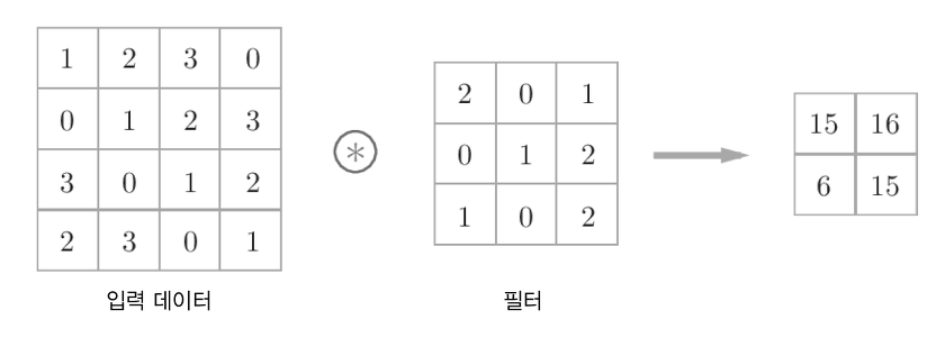

- 입력은 (4, 4), 필터는(3, 3), 출력은(2, 2)가 된다. 문헌에 따라 필터를 커널이라고도 한다.
- 합성곱 연산은 필터의 윈도우를 일정 간격으로 이동해가며 입력 데이터에 적용합니다. 
- 여기에서 말하는 윈도우는 회식 3x3부분을 가리킨다.
- 입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합을 구한다.(단일 곱셉-누산)
- 그리고 그 결과를 출력의 해당 장소에 저장한다. 이 과정을 모든 장소에서 수행하면 합성곱 연산의출력이 완성된다.
  - 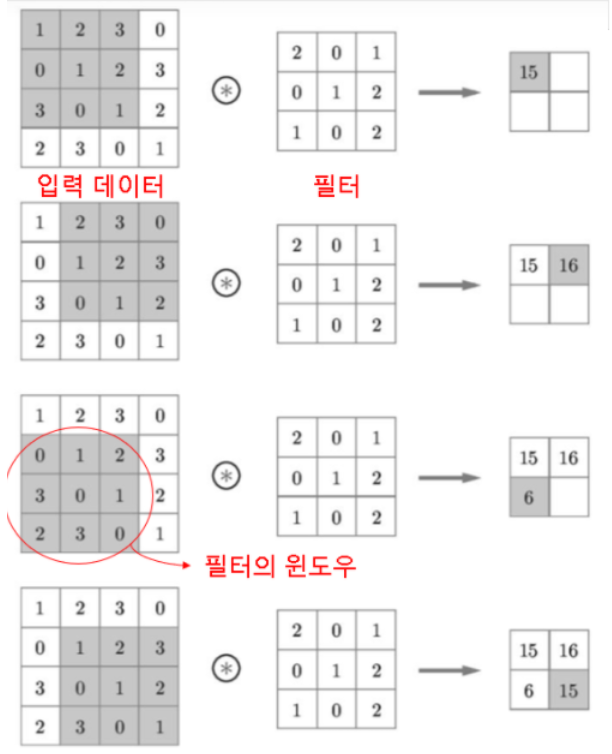

- 완전연결 신경망에서는 가중치 매개변수와 편향이 존재하는데 
  - CNN에서는 필터의 매개변수가 그동안의 '가중치'에 해당한다. 
  - CNN에 편향도 존재한다. 
    - 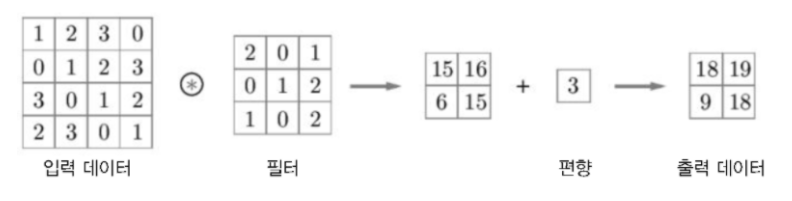
    - 편향은 항상 하나(1x1)만 존재한다.
    - 그 하나의 값을 필터를 적용한 모든 원소에 더하는 것이다.

### 3) 패딩
> 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(예컨대 0)으로 채우기도한다. 이를 패딩이라고 한다. 합성곱 연산에서 자주 이용하는 기법이다.

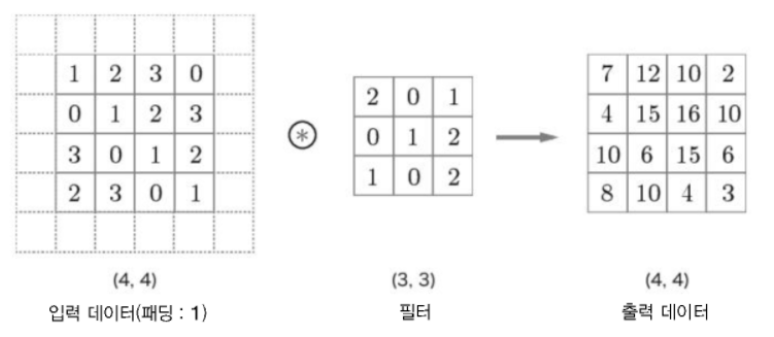

- 처음크기가 (4,4)인 입력 데이터에 패딩이 추가되어(6,6)이 된다.
- 이 입력에 (3,3) 크기의 필터를 걸면 (4,4)크기의 출력 데이터가 생성되낟.
> 패딩은 주로 출력 크기를 조정할 목적으로 사용한다. 예를들어 (4,4)입력 데이터에 (3,3) 필터를 적용하면 출력은 (2,2)가 되어 입력보다 2만큼 줄어든다. 이는 합성곱 연산을 몇 번이나 되풀이하는 심층 신경망에서는 문제가 될 수 있다.<BR><BR> 합성곱 연산을 거칠때 마다 크기가 작아지면 어느시점에서는 출력 크기가 1이 될것이다. 더 이상 합성곱 연산을 적용할 수 없다는 뜻이다.<BR><BR> 앞의 예에서 처럼 패딩 폭을 1로 설정하니 (4,4)입력에 대한 출력이 같은 크기니(4,4)로 유지되었다. 한 마디로 입력 데이터의 공간적 크기를 고정한 채로 다음 계층에 전달할 수 있다.

### 4) 스트라이드
> 필터를 적용하는 위치의 간격을 스트라이드(stride)라고 한다.
  - 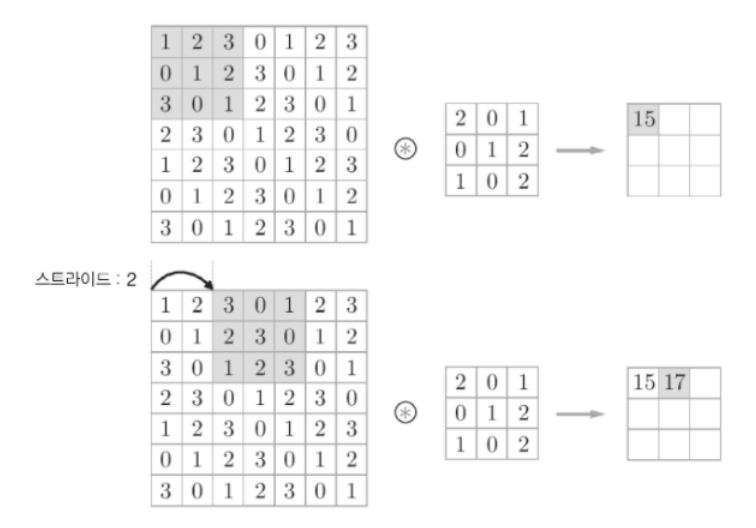

- 스트라이드르 키우면 출력 크기는 작아진다. 출력의 쿠기가 커지는 패딩과는 반대인 셈이다.
- 패딩, 스트라이드, 출력 크기를 어떻게 계산할지 알아보자
  - 입력 크기를(H,W), 필터 크기를 (FH, FW), 출력 크기를(OH, OW), 패딩을 P, 스트라이드를 S
    - 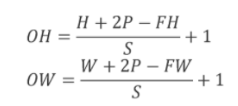

- 정수로 나눠떨어지는 값이어야 한다. 출력의 쿠기가 정수가 아니면 오류를 내는 등의 대응을 해줘야 한다.
- 딥러닝 프레임워크 중에는 값이 딱 나눠떨어지지 않을 때는 가장 가까운 정수로 반올림하는 등 특별히 에러를 내지 않고 진행하도록 구현하는 경우도 있다.

### 5) 3차원 데이터의 합성곱 연산
- 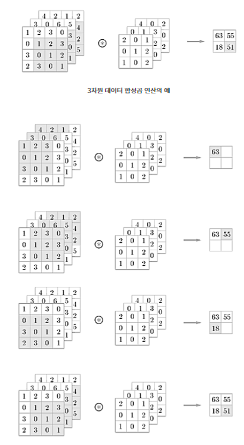

- 이미지의 경우 가로, 세로, 채널수 까지 3차원이다.
- 주의할 점
  - 입력 데이터의 채널 수와 필터의 채널의 수가 같아야 한다.
  - 필터 자체의 크기는 원하는 값으로 설정할 수 있다. 


### 6) 배치처리
> 신경망 처리에서는 입력 데이터를 한 덩어리로 묶어 배치로 처리했습니다. 합성곱 연산도 마찬가지로 비치 처리를 지원한다. 그래서 각 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터로 저장한다. 구체적으로는 데이터를 (데이터 수, 채널 수, 높이, 너비)수능로 저장한다.

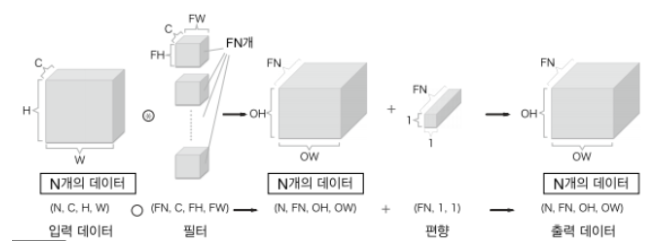

- 배치 처리 시의 데이터 흐름을 나타낸 그림을 보면 각 데이터의 선두에 배치용 차원을 추가했다. 
- 이처럼 데이터는 4차원 형상을 가진 채 각 계층을 타고 흐른다.
- 여기에서 주의할 점은 신경망에 4차원 데이터가 하나 흐를 때마다 데이터 N개에 대한 합성곱이 이뤄진다는 것이다.
- 즉 N회분의 처리를 한 번에 수행하는 것이죠

## 3. 풀링 계층
> 풀링은 세로, 세로 방향의 공간을 줄이는 연산이다. 

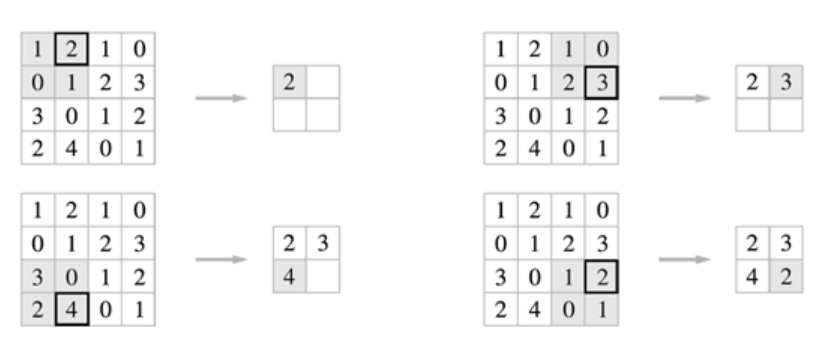

- 2X2 최대풀링(max pooling)을 스트라이드 2로 처리하는 순서이다.
  - 최대 풀링은 최댓값을 구하는 연산으로 2X2는 대상 영역의 크기를 뜻한다.
  - 2X2 최대 풀링은 2X2 크기의 영역에서 가장 큰 원소 하나를 꺼낸다.
- 스트라이드는 이 예에서 2로 설정했다.
  - 2X2 윈도우가 2칸 간격으로 이동한다.
  - 풀링은 윈도우 크기와 스트라이드는 같은 값으로 설정하는 것이 보통이다.예를 들어 윈도우가 3X3이면 스트라이드느 3으로 한다는 것이다.
- 평균풀링(average pooling)
  - 대상영역에서 평균을 계산한다.
  - 이미지 인식 분야에서는 주로 최대 풀링을 사용한다.

### 1) 풀링 계층의 특징
- 학습해야할 매개변수가 없다.
  - 풀링은 대상 영역에서 최댓값이나 평균을 취하는 명확한 처리이므로 특별히 학습할 것이 없다.
- 채널 수가 변하지 않는다.
  - 풀링 연산은 입력 데이터의 채널 수 그대로 출력 데이터로 내보낸다. 채널마다 독립적으로 계산하기 때문이다.
- 입력의 변화에 영향을 적게 받는다.(강건하다)
  - 입력 데이터의 차이를 풀링이 흡수해 사라지게 한다. 

## 4. 합성곱/풀링 계층 구현하기

### 1) 4차원 배열
- 형상이 (10, 1, 28, 28) -> 높이와 너비가 각각 28이고, 채널이 1, 데이터가 10개

In [2]:
import numpy as np
x = np.random.rand(10, 1, 28, 28)
x.shape

(10, 1, 28, 28)

In [3]:
x[0].shape
x[1].shape

(1, 28, 28)

In [4]:
x[0,0]

array([[2.26998068e-01, 1.15868409e-01, 8.32546293e-01, 7.65290284e-02,
        3.23082534e-01, 3.33998305e-01, 9.21742977e-01, 1.13036363e-01,
        4.89449220e-01, 5.69555442e-01, 6.53317892e-01, 4.83028150e-02,
        7.58677918e-01, 6.08346651e-01, 5.12954598e-01, 3.95690416e-01,
        5.52293627e-01, 5.37421933e-01, 1.41477519e-01, 6.72430648e-03,
        2.95607272e-01, 1.47491441e-01, 6.14650391e-01, 7.47312957e-01,
        9.19154967e-01, 1.87670706e-01, 3.01517377e-01, 6.39148641e-01],
       [2.41096855e-01, 8.56636572e-01, 5.37550767e-01, 5.19967736e-01,
        1.33350445e-01, 4.66743436e-01, 8.61857621e-01, 8.48133181e-01,
        4.17001347e-01, 3.05067755e-01, 3.17081802e-01, 8.40003856e-01,
        1.88889493e-01, 7.82138131e-01, 9.43651369e-01, 3.78444661e-01,
        6.55470539e-01, 9.75305447e-01, 5.84381459e-01, 2.23787273e-01,
        4.50084316e-01, 5.82299102e-01, 8.99205147e-01, 6.74041929e-01,
        9.50134932e-01, 5.34399067e-01, 7.07558383e-01, 8.56554

### 2) im2col로 데이터 전처리
> 입력 데이터를 필터링(가중치 계산)하기 좋게 전개하는(펼치는) 함수이다. 3차원 입력 데이터에 im2col을 적용하면 2차원 행렬로 바뀌게 된다.(정확히는 배치안의 데이터 수까지 포함한 4차원 데이터를 2차원으로 변환한다.) <br><br> im2col로 입력 데이터를 전개한 다음에 합성곱 계층의 필터를 1열로 전개하고 두 행렬의 곱을 계산하면 이는 완전연결 계층의 Affine 계층에서 한 것과 같다.<br><br> im2col 방식으로 출력한 결과는 2차원 행렬이다. CNN은 데이터를 4차원 배열로 저장하므로 2차원 출력 데이터를 4차원으로 변형한다.

### 3) 합성곱 계층 구현하기
> 이 책에서는 im2col을 미리 만들어 제공한다.

In [5]:
import sys
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥")
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(9, 75)
(90, 75)
